# Controllers

In [91]:
file_name = '../../datasets/Jenkins Docs QA.csv'
questions_col = 'Question'
answers_col = 'Answer'

# file_name = '../../datasets/Community Questions Refined.csv'
# questions_col = 'questions'
# answers_col = 'answers'

# file_name = '../../datasets/QueryResultsUpdated.csv'
# questions_col = 'Question Body'
# answers_col = 'Answer Body'
max_sequence_length = 11000
num_samples = 1000 # None

# Imports

In [92]:
from utils import *
import pandas as pd
from datasets import Dataset

# Load And Process Our Dataset - External Sources

In [93]:
raw_data = pd.read_csv(file_name)

In [94]:
len(raw_data)

765

In [95]:
raw_data.head(2)

,Question,Answer
0,What is Jenkins?,"Jenkins is a self-contained, open-source autom..."
1,What should I refer to if I want to develop my...,If you want to extend the functionality of Jen...


In [96]:
# Define condition to drop rows where answers_col has a code tag in
condition = raw_data[answers_col].str.contains('<code>')

# Drop rows based on the condition
raw_data = raw_data[~condition]

In [97]:
len(raw_data)

765

In [98]:
raw_data.head(5)

,Question,Answer
0,What is Jenkins?,"Jenkins is a self-contained, open-source autom..."
1,What should I refer to if I want to develop my...,If you want to extend the functionality of Jen...
2,What is the purpose of this Jenkins documentat...,The purpose of this documentation is to help u...
3,What is a good starting point for users who ha...,Users who have never used Jenkins or have limi...
4,Where can I find more detailed information abo...,For more detailed information about using Jenk...


In [99]:
raw_data[answers_col]

0      Jenkins is a self-contained, open-source autom...
1      If you want to extend the functionality of Jen...
2      The purpose of this documentation is to help u...
3      Users who have never used Jenkins or have limi...
4      For more detailed information about using Jenk...
                             ...                        
760    File fingerprinting in Jenkins is used to trac...
761    To set up file fingerprinting in Jenkins, rele...
762    Jenkins stores the MD5 checksum (fingerprint) ...
763    Jenkins users can benefit from file fingerprin...
764    Some typical scenarios where file fingerprinti...
Name: Answer, Length: 765, dtype: object

In [100]:
# Define condition to drop rows where questions_col has code tag
condition = raw_data[questions_col].str.contains('<code>')

# Drop rows based on the condition
raw_data = raw_data[~condition]

In [101]:
len(raw_data)

765

In [102]:
raw_data.head()

,Question,Answer
0,What is Jenkins?,"Jenkins is a self-contained, open-source autom..."
1,What should I refer to if I want to develop my...,If you want to extend the functionality of Jen...
2,What is the purpose of this Jenkins documentat...,The purpose of this documentation is to help u...
3,What is a good starting point for users who ha...,Users who have never used Jenkins or have limi...
4,Where can I find more detailed information abo...,For more detailed information about using Jenk...


In [104]:
# Combine columns into the desired format
df = pd.DataFrame(columns=['text'])

df['text'] = raw_data.apply(
    lambda row: f"<s>[INST] {row[questions_col].strip()} [/INST] {row[answers_col]} </s>",
    axis=1
)
print(f'length of our dataset: {len(df)}')

length of our dataset: 765


In [5]:
# Calculate the length of each row
df['row_length'] = df['text'].apply(len)

# Find the maximum row length
max_length = df['row_length'].max()
print(f"The maximum row length is: {max_length}")

The maximum row length is: 30508


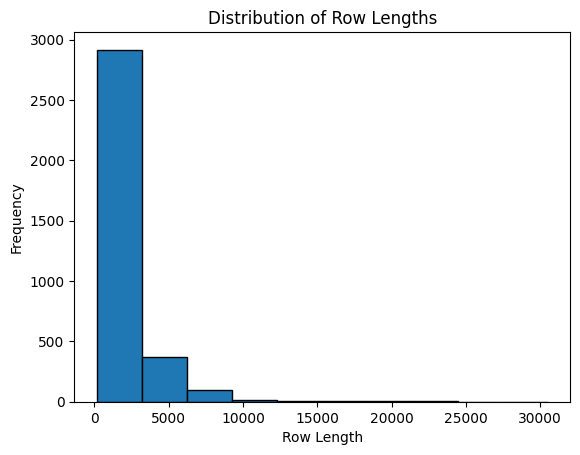

In [6]:
plot_histogram(df['row_length'])

In [7]:
# Filter out rows with length more than max_sequence_length (i.e. 11000) to obtain just acceptable length of input
df_filtered = df[df['row_length'] <= max_sequence_length]

# Display the filtered DataFrame
print(len(df_filtered))

3391


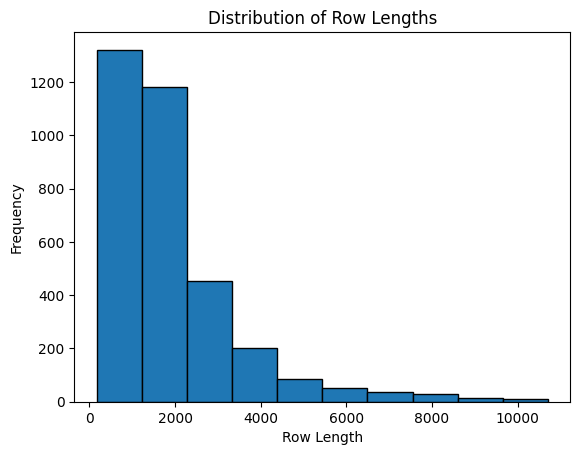

In [8]:
plot_histogram(df_filtered['row_length'])

In [9]:
# drop un needed columns
df_filtered = df_filtered.drop(['row_length'], axis=1)

In [10]:
# convert to dataset and select num_samples (i.e. 1000) record for now (considering memory resource)
dataset = Dataset.from_pandas(df_filtered)

if num_samples: 
  dataset = dataset.select(range(num_samples))

In [11]:
dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 1000
})